In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier

### 1. Loading Dataset

The data used for this project come from: https://www.kaggle.com/competitions/titanic/data

In [2]:
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

**1.1 Train dataset - EDA**

**1.1.1. Understanding the data**

In [3]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This table shows a subset of the Titanic dataset used for a binary classification task. The dataset consists of eleven features and one target variable (Survived). Four features are numerical (Age, Fare, SibSp, Parch), three are categorical (Sex, Pclass, Embarked), and the remaining fields include an identifier (PassengerId) and text-based features (Name, Ticket, Cabin).

In [4]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the initial inspection using the describe() method, no extreme outliers are observed, as the minimum and maximum values of the numerical features fall within reasonable ranges. The Age, Fare, SibSp, and Parch columns are numerical features with different value scales, particularly Fare, which shows a wider range. Therefore, feature scaling may be required to improve the performance and convergence of certain machine learning algorithms. Additionally, slight skewness is observed in some features, especially Fare and SibSp; however, the skewness is not severe enough to indicate significant distribution imbalance.

In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset contains 891 entries. There are missing values in the Age, Cabin, and Embarked columns, which will need to be handled during data preprocessing.

In [6]:
dataset_train.nunique() 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**1.1.2 Data Visuzalization**

**1.1.2.1 Label - Surivived**

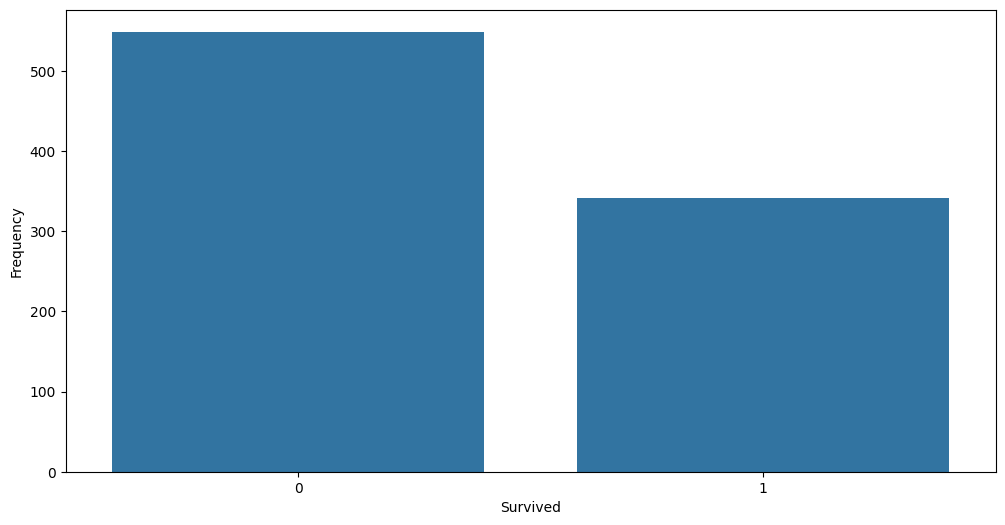

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x=dataset_train["Survived"])
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.show()

The dataset is slightly imbalanced with respect to the target variable (Survived). There are approximately 550 instances of people who did not survive (label 0) and approximately 350 instances of people who survived (label 1).

**1.1.2.2 - Features**

**1.1.2.3 - Analysis of the Passanger Class column**

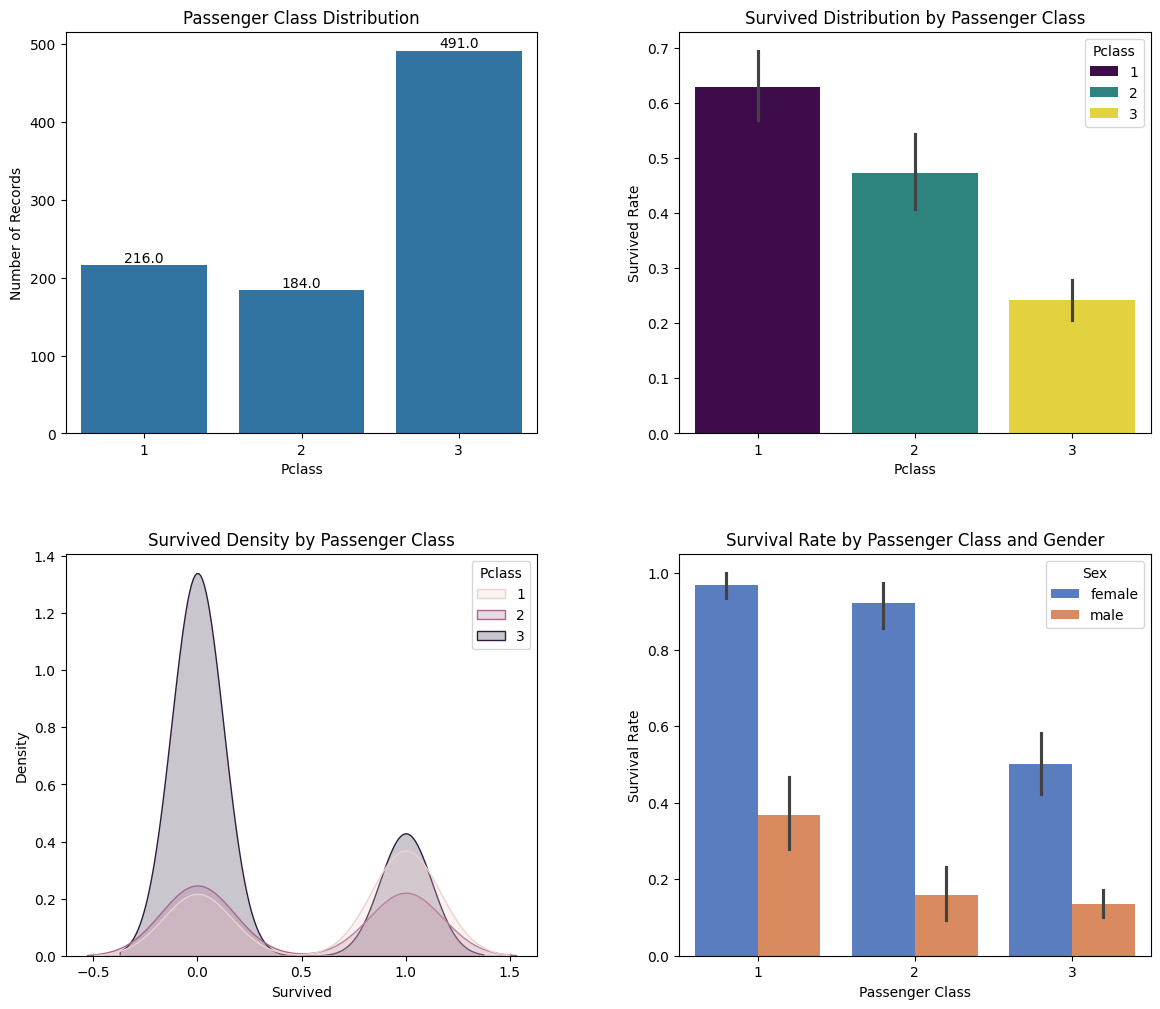

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

sns.countplot(x="Pclass", data=dataset_train, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height()}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="bottom")
ax[0].set_title("Passenger Class Distribution")
ax[0].set_ylabel("Number of Records")

sns.barplot(x="Pclass", y="Survived", data=dataset_train, ax=ax[1], hue="Pclass", palette="viridis")
ax[1].set_title("Survived Distribution by Passenger Class")
ax[1].set_ylabel("Survived Rate")

sns.kdeplot(data=dataset_train, x="Survived", hue="Pclass", fill=True, ax=ax[2])
ax[2].set_title("Survived Density by Passenger Class")
ax[2].set_xlabel("Survived")

sns.barplot(
    x="Pclass",
    y="Survived",
    hue="Sex",
    data=dataset_train,
    palette="muted"
)
ax[3].set_title("Survival Rate by Passenger Class and Gender")
ax[3].set_xlabel("Passenger Class")
ax[3].set_ylabel("Survival Rate")


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The Passenger Class feature is imbalanced. Classes 1 and 2 have similar numbers of passengers (216 and 184, respectively), while Class 3 is overrepresented with 491 passengers, approximately two and a half times more than Class 2. The survival rate is highest for passengers in Class 1 (over 60%), followed by Class 2 (approximately 50%), and lowest for Class 3 (around 25%). When further analyzed by gender, it is evident that females have a significantly higher likelihood of survival across all classes.

**1.1.2.4 - Analysis of the Sex column**

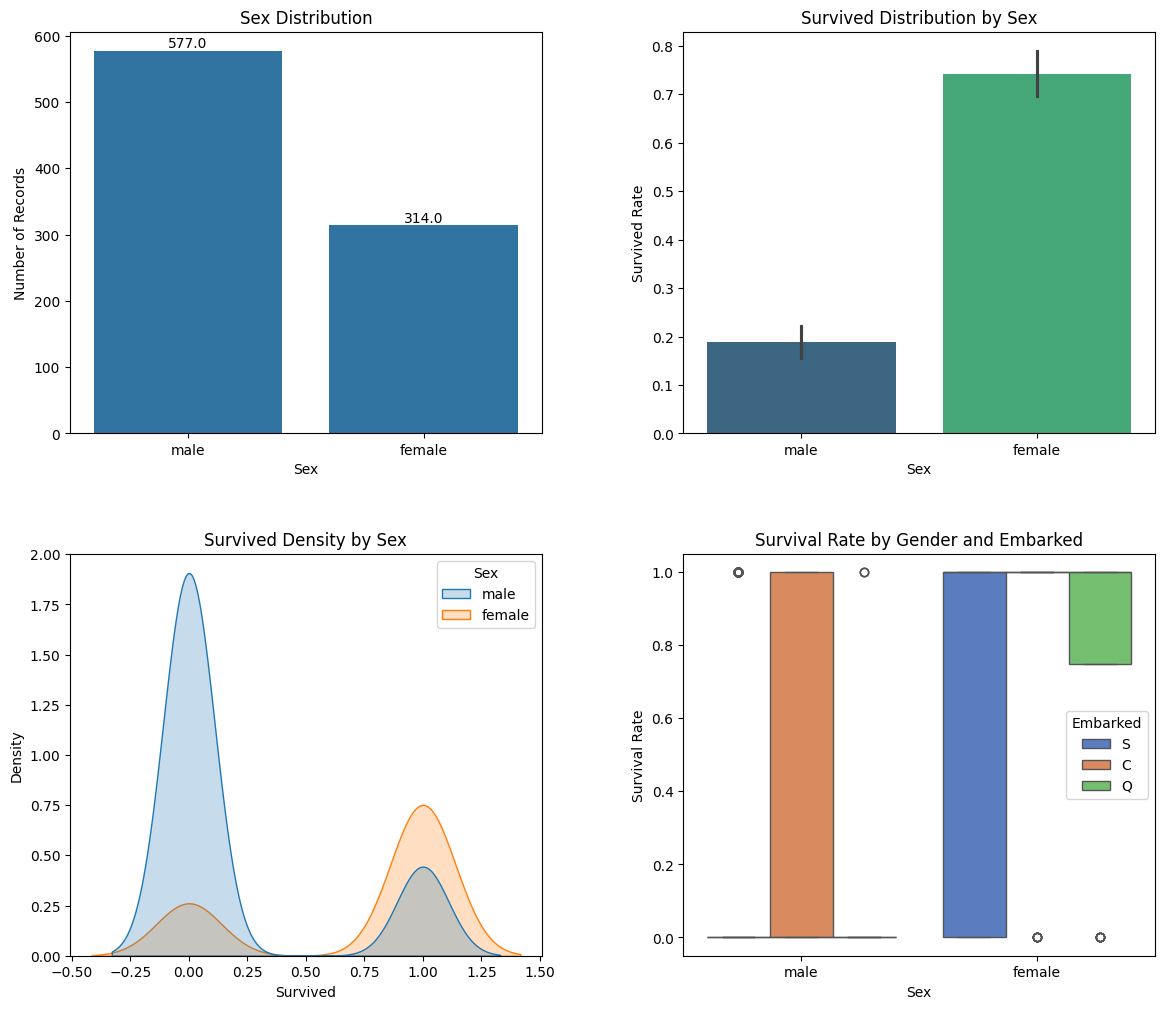

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

sns.countplot(x="Sex", data=dataset_train, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height()}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="bottom")
ax[0].set_title("Sex Distribution")
ax[0].set_ylabel("Number of Records")

sns.barplot(x="Sex", y="Survived", data=dataset_train, ax=ax[1], hue="Sex", palette="viridis")
ax[1].set_title("Survived Distribution by Sex")
ax[1].set_ylabel("Survived Rate")

sns.kdeplot(data=dataset_train, x="Survived", hue="Sex", fill=True, ax=ax[2])
ax[2].set_title("Survived Density by Sex")
ax[2].set_xlabel("Survived")

sns.boxplot(
    x="Sex",
    y="Survived",
    hue="Embarked",
    data=dataset_train,
    palette="muted"
)
ax[3].set_title("Survival Rate by Gender and Embarked")
ax[3].set_xlabel("Sex")
ax[3].set_ylabel("Survival Rate")


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The Sex feature is imbalanced, with nearly twice as many male passengers as female passengers. Female passengers are significantly more likely to survive than male passengers, with survival rates of approximately 80% for females compared to 20% for males. When examining survival rates by both gender and embarkation point (Embarked), the proportions of survivors remain consistent across the three embarkation points (S, C, and Q), indicating a similar survival pattern regardless of gender.

**1.1.2.5 - Analysis of the Age column**

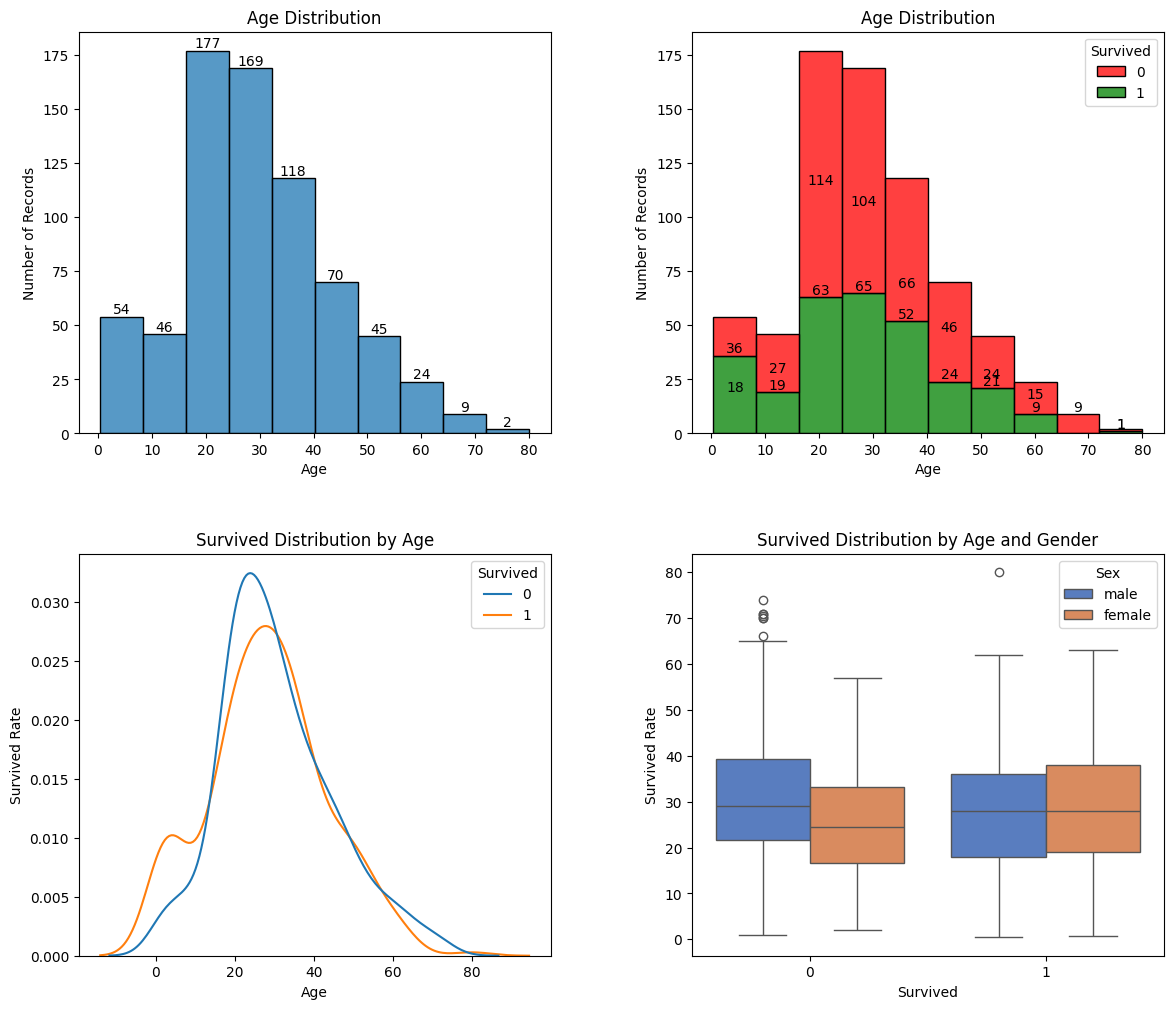

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

sns.histplot(
    data=dataset_train,
    x="Age",
    bins=10,
    ax=ax[0]
)
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height()}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="bottom")
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Number of Records")


sns.histplot(
    data=dataset_train,
    x="Age",
    bins=10,
    hue="Survived",
    multiple="stack",
    palette={0:"red", 1:"green"},
    ax=ax[1]
)

for p in ax[1].patches: 
    height = p.get_height()
    if height > 0:
        ax[1].annotate(f"{int(height)}", 
                    (p.get_x() + p.get_width()/2., height), 
                    ha="center", va="bottom")
ax[1].set_title("Age Distribution")
ax[1].set_ylabel("Number of Records")



sns.kdeplot(
    data=dataset_train,
    x="Age",
    hue="Survived",
    common_norm=False,
    ax=ax[2]
)

ax[2].set_title("Survived Distribution by Age")
ax[2].set_ylabel("Survived Rate")


sns.boxplot(data=dataset_train, x="Survived", y="Age", hue="Sex", palette="muted", ax=ax[3])

ax[3].set_title("Survived Distribution by Age and Gender")
ax[3].set_ylabel("Survived Rate")


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The distribution of the Age feature resembles a Gamma-like distribution. The distributions for both outcomes—survived and not survived—follow a similar pattern, with roughly proportional representation across age ranges. Since the age distributions for survivors and non-survivors largely mirror the overall age distribution in the dataset, Age alone does not exhibit a strong predictive correlation with survival.

**1.1.2.6 - Analysis of the SibSp column**

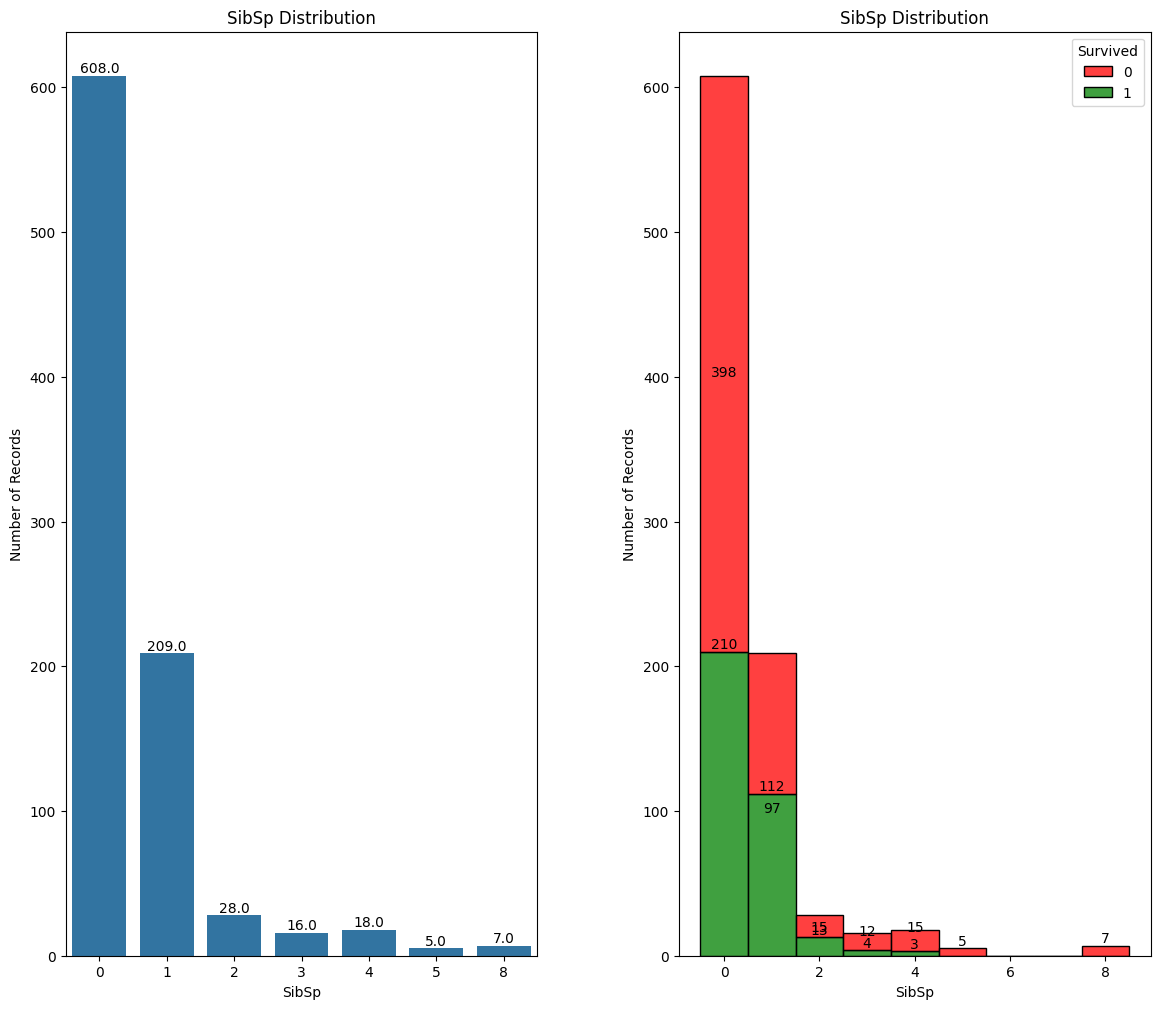

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 12))
ax = ax.flatten()


sns.countplot(x="SibSp", data=dataset_train, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height()}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="bottom")
ax[0].set_title("SibSp Distribution")
ax[0].set_ylabel("Number of Records")



sns.histplot(
    data=dataset_train,
    x="SibSp",
    hue="Survived",
    multiple="stack",
    palette={0:"red", 1:"green"},
    binwidth=1,
    discrete=True,       
    ax=ax[1]
)

for p in ax[1].patches: 
    height = p.get_height()
    if height > 0:
        ax[1].annotate(f"{int(height)}", 
                    (p.get_x() + p.get_width()/2., height), 
                    ha="center", va="bottom")
ax[1].set_title("SibSp Distribution")
ax[1].set_ylabel("Number of Records")

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The distribution of the SibSp feature resembles an exponential-like distribution, with the majority of passengers having zero or one sibling/spouse aboard and progressively fewer passengers in higher categories. When divided by survival outcome, the proportions between survivors and non-survivors appear relatively similar across most categories. This suggests that SibSp alone may not have a strong linear relationship with survival, although certain small family sizes may still carry predictive value when combined with other features.

**1.1.2.7 - Analysis of the Parch column**

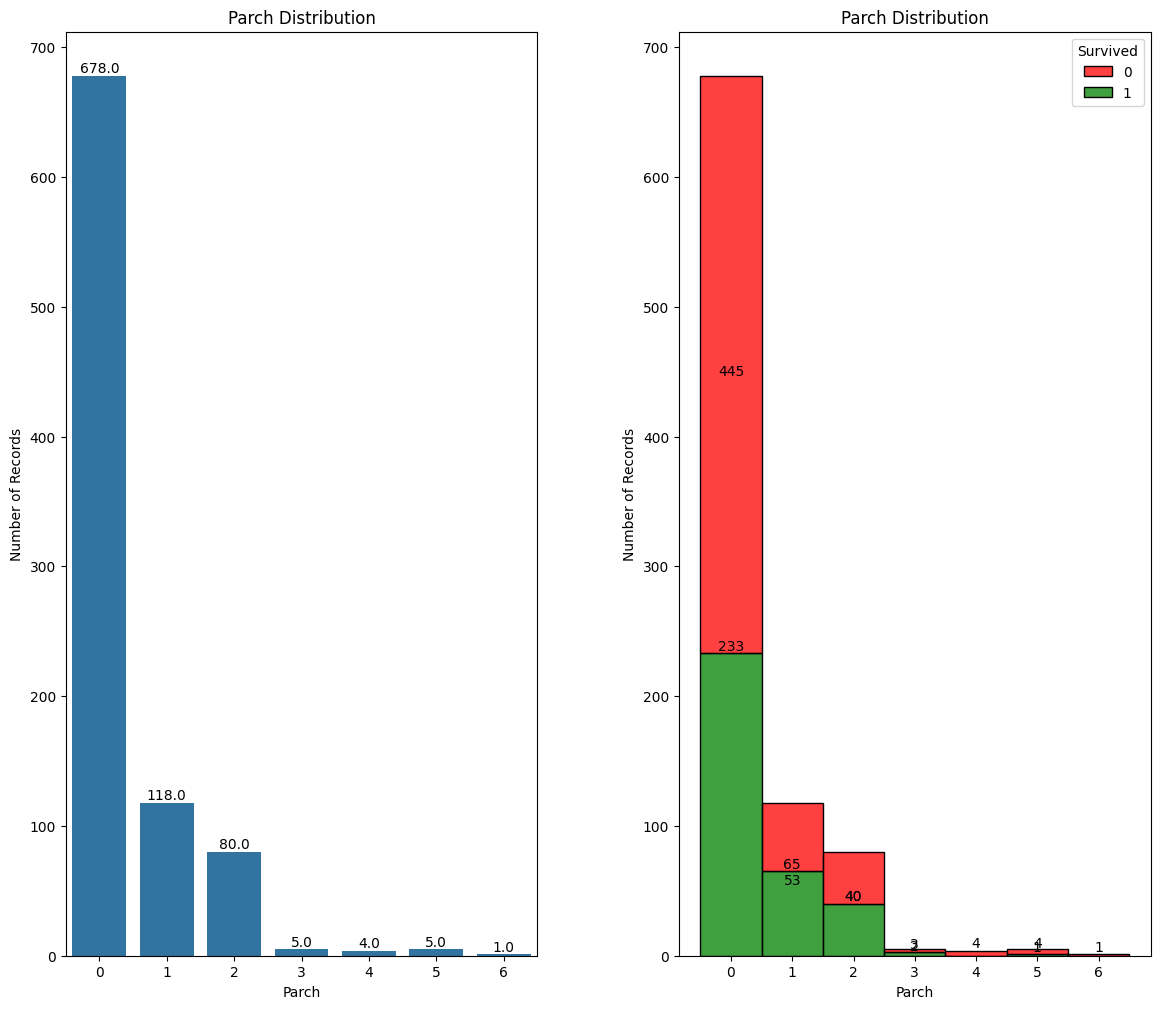

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 12))
ax = ax.flatten()

sns.countplot(x="Parch", data=dataset_train, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height()}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha="center", va="bottom")
ax[0].set_title("Parch Distribution")
ax[0].set_ylabel("Number of Records")

sns.histplot(
    data=dataset_train,
    x="Parch",
    hue="Survived",
    multiple="stack",
    palette={0:"red", 1:"green"},
    binwidth=1,
    discrete=True,       
    ax=ax[1]
)

for p in ax[1].patches: 
    height = p.get_height()
    if height > 0:
        ax[1].annotate(f"{int(height)}", 
                    (p.get_x() + p.get_width()/2., height), 
                    ha="center", va="bottom")
ax[1].set_title("Parch Distribution")
ax[1].set_ylabel("Number of Records")

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The distribution of the Parch feature also resembles an exponential-like distribution, with most passengers having zero parents or children aboard and significantly fewer passengers in higher categories. When separated by survival outcome, the proportions of survivors and non-survivors appear relatively similar across most Parch values. This indicates that, on its own, Parch may not exhibit a strong direct correlation with survival. However, it could still provide predictive value when combined with related features such as SibSp (e.g., through a derived family size variable).

**1.1.2.8 - Analysis of the Fare column**

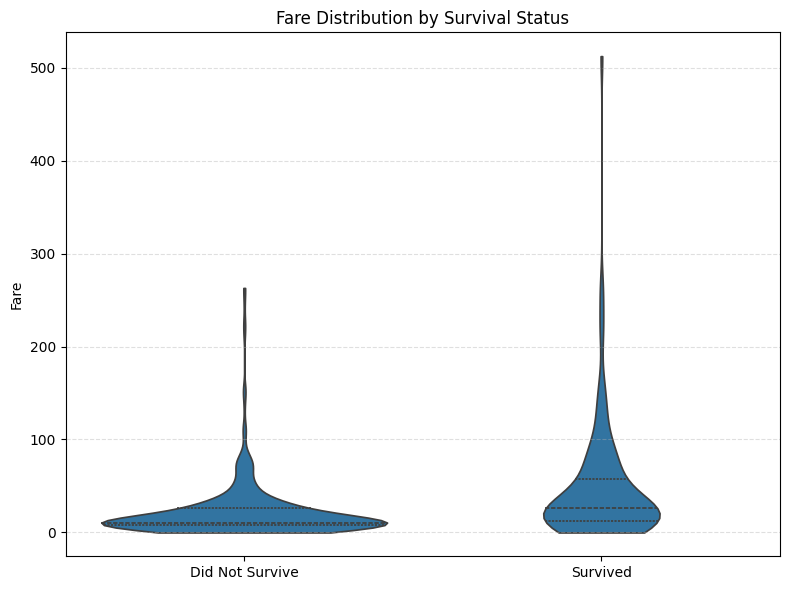

In [13]:
plt.figure(figsize=(8, 6))

sns.violinplot(
    x="Survived",
    y="Fare",
    data=dataset_train,
    inner="quartile",   
    cut=0               
)

plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.ylabel("Fare")
plt.xlabel("")
plt.title("Fare Distribution by Survival Status")

plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Due to the wide range and variability of the Fare feature, it is difficult to draw strong conclusions based solely on visual inspection. While there appears to be a general trend suggesting that passengers who paid higher fares had a higher probability of survival, the relationship is relatively weak.

The observed correlation between Fare and survival is positive but not strong enough to indicate that Fare alone is a highly predictive feature. Therefore, although Fare may contribute some predictive value, it is unlikely to be a strong standalone predictor and should be evaluated in combination with other features.

**1.1.2.9 - Analysis of the Embarked column**

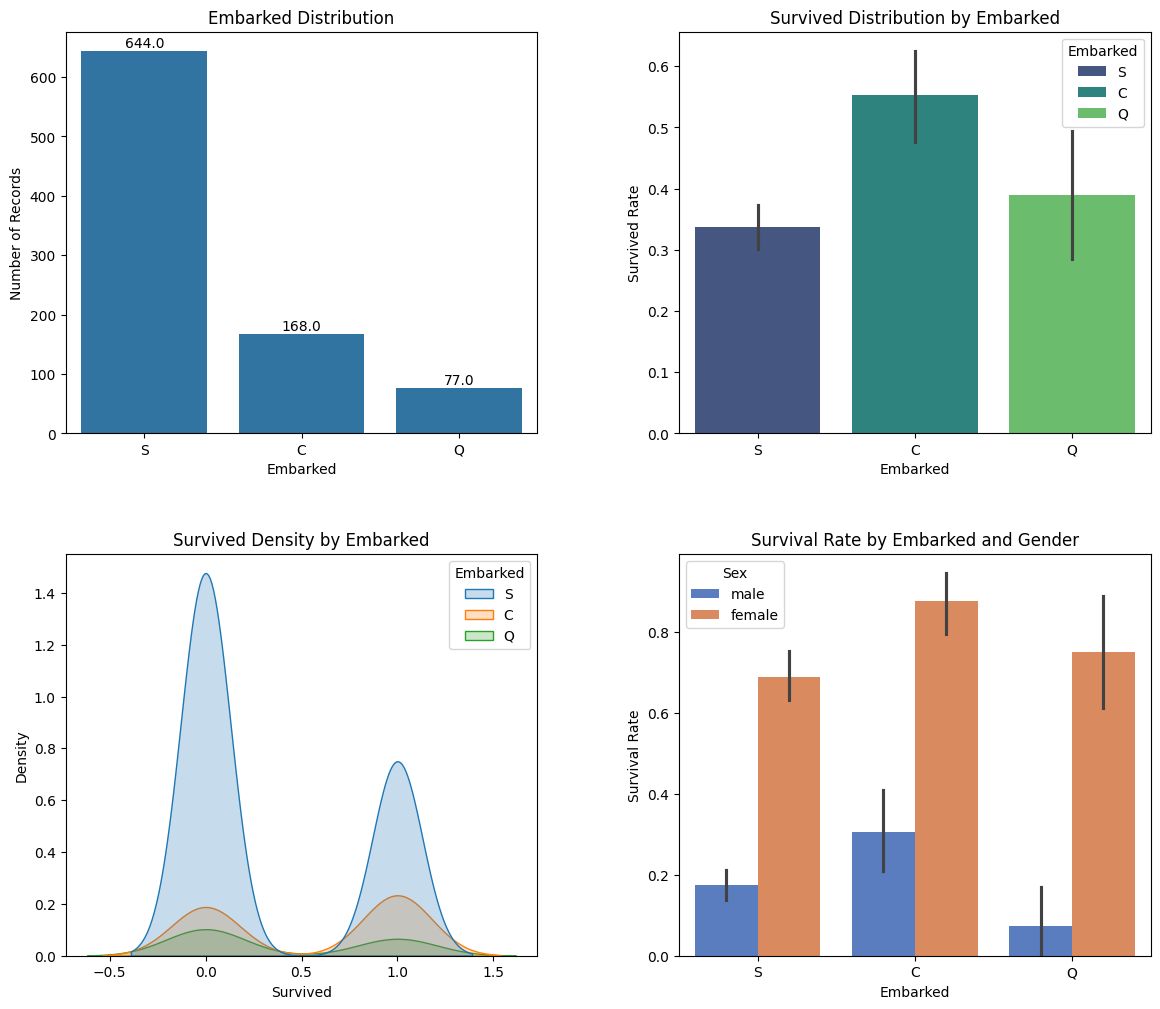

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

sns.countplot(x='Embarked', data=dataset_train, ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
ax[0].set_title('Embarked Distribution')
ax[0].set_ylabel('Number of Records')

sns.barplot(x='Embarked', y='Survived', data=dataset_train, ax=ax[1], hue="Embarked", palette="viridis")
ax[1].set_title('Survived Distribution by Embarked')
ax[1].set_ylabel('Survived Rate')

sns.kdeplot(data=dataset_train, x='Survived', hue='Embarked', fill=True, ax=ax[2])
ax[2].set_title('Survived Density by Embarked')
ax[2].set_xlabel('Survived')

sns.barplot(
    x="Embarked",
    y="Survived",
    hue="Sex",
    data=dataset_train,
    palette="muted"
)
ax[3].set_title("Survival Rate by Embarked and Gender")
ax[3].set_xlabel("Embarked")
ax[3].set_ylabel("Survival Rate")


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

The Embarked feature is imbalanced. Port C has 644 records and is overrepresented compared to port S (168 records) and port Q (77 records). In terms of survival rates, passengers who embarked from port C have the highest survival rate (approximately 60%), followed by those from port Q (around 40%). The lowest survival rate is observed among passengers embarking from port S (approximately 35%).Further analysis by gender shows that female passengers have a significantly higher probability of survival across all embarkation ports. This suggests that both Embarked and Sex are potentially important predictive features, and there may also be interaction effects between them.

**1.1.2.10 - Correlation Heatmap**

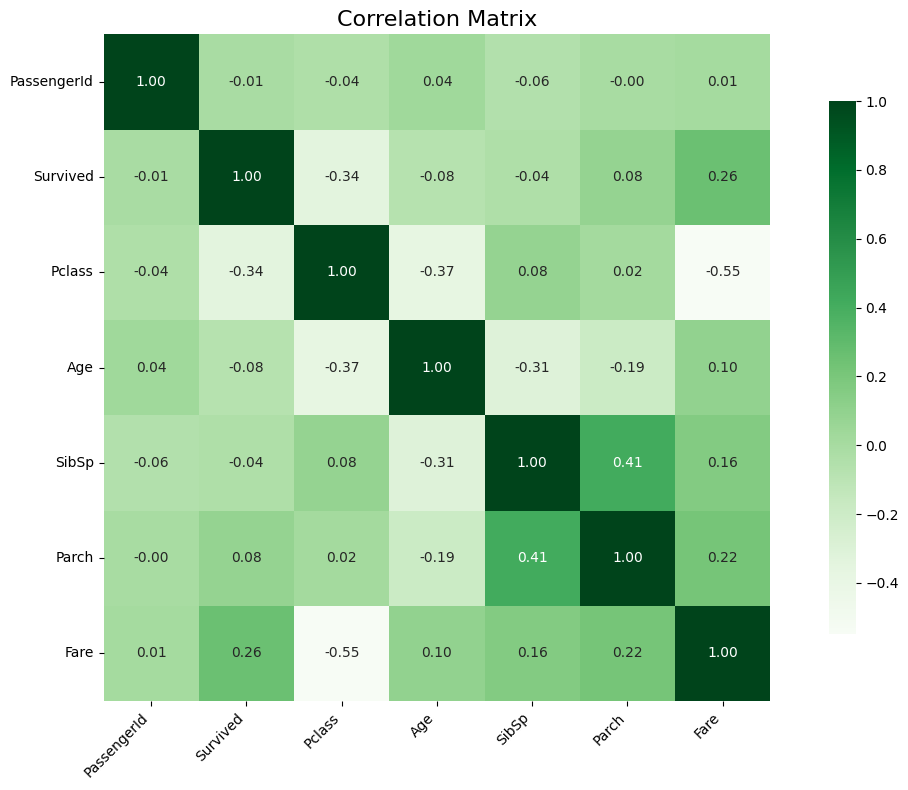

In [15]:
plt.figure(figsize=(12, 8)) 

sns.heatmap(
    dataset_train.corr(numeric_only=True),
    cmap="Greens",
    annot=True,
    fmt=".2f",       
    square=True,      
    cbar_kws={"shrink": 0.8} 
)

plt.title("Correlation Matrix", fontsize=16) 
plt.xticks(rotation=45, ha="right")           
plt.yticks(rotation=0)
plt.tight_layout()                        
plt.show()

As shown in the correlation matrix, the strongest linear relationships between the features and the target variable (Survived) are:

Pclass: 34%

Fare: 26%

The remaining numerical features show little to no correlation (below 10%) with the target variable.

It is important to note that this correlation matrix includes only numerical features prior to preprocessing. Categorical variables such as Sex and Embarked were not yet encoded, and therefore their relationships with the target variable are not reflected in this analysis. After appropriate encoding, these features may exhibit stronger associations with survival.

Additionally, correlation measures only linear relationships. Features with relatively low correlation values may still contribute significantly to predictive performance through non-linear effects or interactions with other variables.

----------------------------------------------------------------------------------------------------------------------------------------------------

The Name and Cabin features are not well suited for direct visualization due to their high cardinality and categorical nature. Both variables contain a large number of unique values, making it difficult to extract meaningful patterns through standard plots.

Additionally, these features do not provide straightforward numerical relationships with the target variable without further preprocessing. Therefore, direct visualization is limited, and feature engineering techniques (e.g., extracting titles from Name or deck information from Cabin) would be more appropriate for leveraging their predictive value.

**1.2 Test data - EDA**

**1.2.1. Understanding the data**

In [16]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The subset of the test dataset contains exactly the same features as the training dataset. The structure and categorical features are also identical. Therefore, the preprocessing applied to this dataset will be the same as that used for the training dataset.

In [17]:
dataset_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


An initial inspection using the describe() method indicates that the statistical characteristics of this dataset are consistent with those of the training dataset. Therefore, the same preprocessing procedures will be applied to ensure consistency in feature handling.

In [18]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The test dataset contains 418 entries. There are missing values in the Age, Cabin, and Fare columns, which, as in the training dataset, need to be handled during data preprocessing.

In [19]:
dataset_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

**1.2.2 Data Visuzalization**

**1.2.2.1 - Features**

For the test dataset, visualizations will focus solely on the distribution of selected features. Since the dataset does not include labels, these visualizations are intended for exploratory analysis only and cannot be used to draw definitive conclusions. As mentioned in the visualization of the training dataset, the features name and cabin will not be presented due to their high cardinality and categorical nature.

**1.2.2.2 - Analysis of the Passanger Class column**

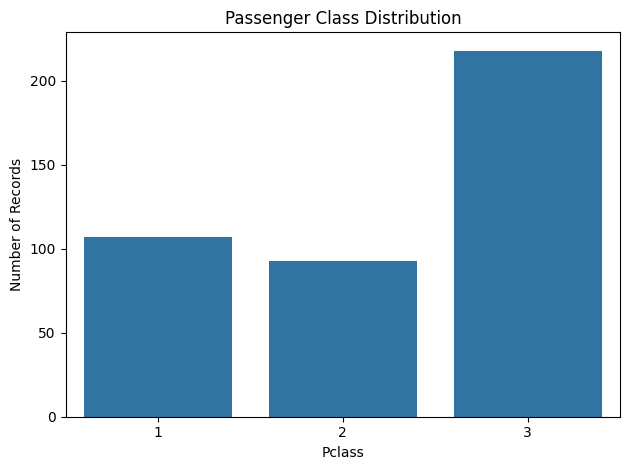

In [20]:
sns.countplot(x='Pclass', data=dataset_test)
plt.title('Passenger Class Distribution')
plt.ylabel('Number of Records')

plt.tight_layout()
plt.show()

**1.2.2.3 - Analysis of the Sex column**

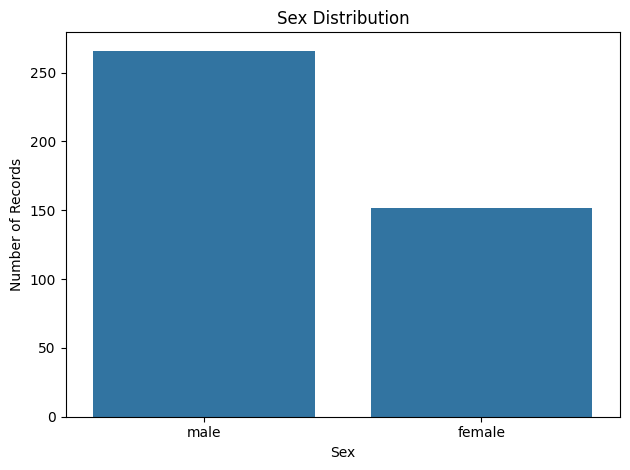

In [21]:
sns.countplot(x='Sex', data=dataset_test)
plt.title('Sex Distribution')
plt.ylabel('Number of Records')

plt.tight_layout()
plt.show()

**1.2.2.4 - Analysis of the Age column**

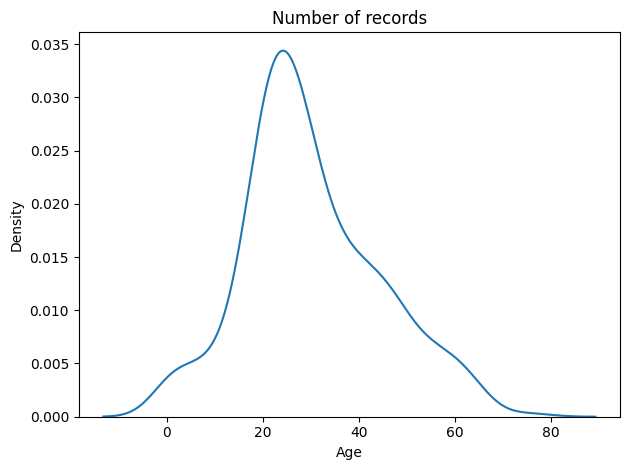

In [22]:
sns.kdeplot(data=dataset_test, x='Age')
plt.title('Number of records')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

**1.2.2.5 - Analysis of the SibSp column**

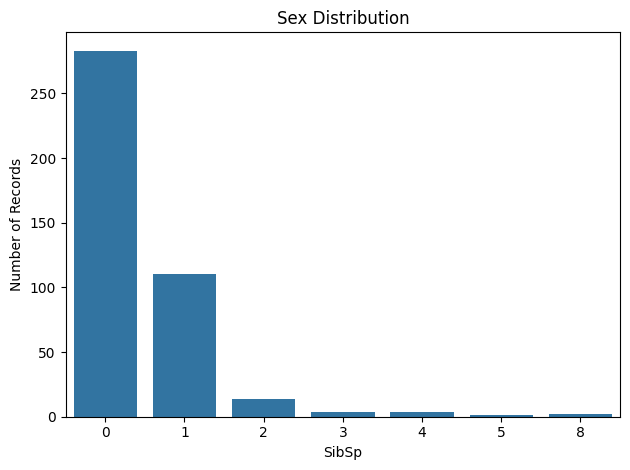

In [23]:
sns.countplot(x='SibSp', data=dataset_test)
plt.title('Sex Distribution')
plt.ylabel('Number of Records')

plt.tight_layout()
plt.show()

**1.2.2.6 - Analysis of the Parch column**

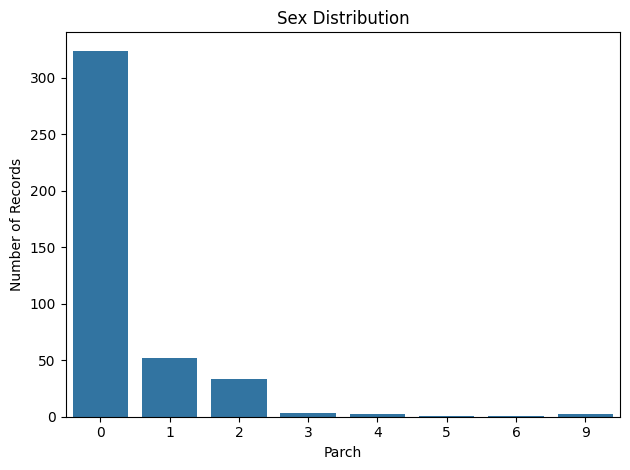

In [24]:
sns.countplot(x='Parch', data=dataset_test)
plt.title('Sex Distribution')
plt.ylabel('Number of Records')

plt.tight_layout()
plt.show()

**1.2.2.7 - Analysis of the Fare column**

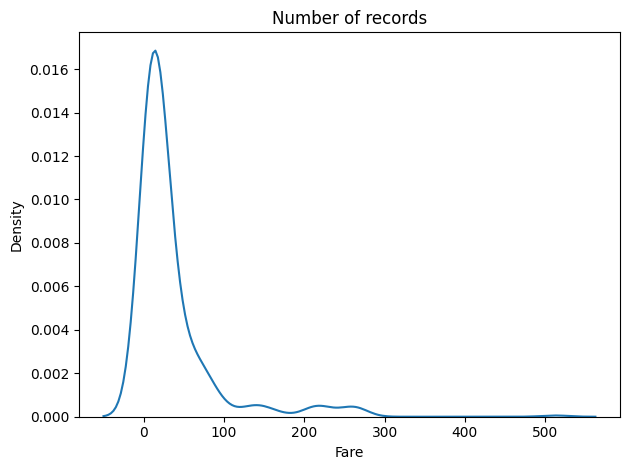

In [25]:
sns.kdeplot(data=dataset_test, x="Fare")
plt.title("Number of records")
plt.xlabel("Fare")

plt.tight_layout()
plt.show()

**1.2.2.8 - Analysis of the Embarked column**

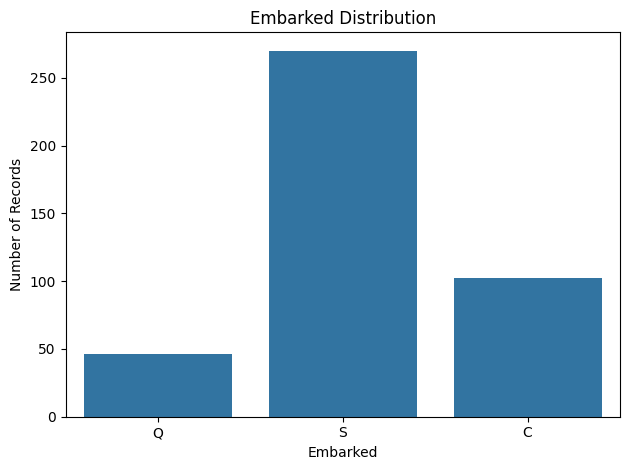

In [26]:
sns.countplot(x='Embarked', data=dataset_test)
plt.title('Embarked Distribution')
plt.ylabel('Number of Records')

plt.tight_layout()
plt.show()

### 2. Data Cleaning

**2.1 Check and remove duplicates**

In [27]:
dataset_train.duplicated().sum()

np.int64(0)

In [28]:
dataset_test.duplicated().sum()

np.int64(0)

There are no duplicates to remove in either the training or the test dataset.

**2.2 Detect missing values**

In [29]:
dataset_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are missing values in three columns: Age, Cabin, and Embarked. Due to the large number of missing values in the Cabin feature, it will be dropped. Missing values in the Age column will be replaced with the median after analyzing its distribution. On the other hand, missing values in the Embarked column will be replaced with the mode, based on the feature's distribution.

In [ ]:
dataset_train['Age'].fillna(dataset_train['Age'].median(), inplace=True)
dataset_train = dataset_train.drop(["Cabin"], axis= 1)
dataset_train['Embarked'].fillna(dataset_train['Embarked'].mode()[0], inplace = True)

In [31]:
dataset_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
dataset_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are missing values in three columns: Age, Cabin, and Fare. Due to the large number of missing values in the Cabin feature, it will be dropped. Missing values in the Age and Fare columns will be imputed using the median, based on an analysis of their distributions.

In [ ]:
dataset_test['Age'].fillna(dataset_test['Age'].median(), inplace=True)
dataset_test['Fare'].fillna(dataset_test['Fare'].median(), inplace=True)
dataset_test = dataset_test.drop(["Cabin"], axis= 1)

In [34]:
dataset_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**2.3 Droping Irrelavant Columns**

The Ticket column, despite being present in most entries, was dropped because it does not provide meaningful information for predicting survival.

In [35]:
dataset_train = dataset_train.drop(["Ticket"], axis= 1)
dataset_test = dataset_test.drop(["Ticket"], axis= 1)

In [36]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [37]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


Don't need to correcting: validation, handling dates and times, handling outliers or correcting datatypes.

### 3. Feature Engineering

**3.1 Binary Encoding**

The Sex feature consists of two categories (male and female). In the preprocessing stage, it will be transformed into a binary variable, where male was encoded as 1 and female as 0.

In [ ]:
dataset_train['Sex'] = dataset_train['Sex'].replace({'male': 1, 'female': 0})
dataset_test['Sex'] = dataset_test['Sex'].replace({'male': 1, 'female': 0})

**3.2 One-hot encoding**

There is only one column that should be one-hot encoded: embarked.

**3.2.1 Train dataset**

In [39]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
embarked_encoded = ohe.fit_transform(dataset_train[['Embarked']])
embarked_cols = ohe.get_feature_names_out(['Embarked'])
embarked_dataset = pd.DataFrame(embarked_encoded, columns=embarked_cols, index=dataset_train.index)

In [40]:
dataset_train = dataset_train.drop('Embarked', axis=1)
dataset_train = pd.concat([dataset_train, embarked_dataset], axis=1)

In [41]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0


**3.2.2 Test dataset**

In [42]:
embarked_encoded_test = ohe.fit_transform(dataset_test[['Embarked']])
embarked_cols_test = ohe.get_feature_names_out(['Embarked'])
embarked_dataset = pd.DataFrame(embarked_encoded_test, columns=embarked_cols_test, index=dataset_test.index)

In [43]:
dataset_test = dataset_test.drop('Embarked', axis=1)
dataset_test = pd.concat([dataset_test, embarked_dataset], axis=1)

In [44]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0


**3.3 Adding new features from Name column**

Extracting titles from the Name column has shown promising results in improving the model's ability to predict survival; therefore, this feature was included in the project.

**3.3.1 Train dataset**

In [45]:
dataset_train['Title'] = dataset_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0.0,0.0,1.0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,0.0,0.0,1.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,0.0,0.0,1.0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1.0,0.0,0.0,Mr


In [46]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
dataset_train['Title'] = dataset_train['Title'].replace(rare_titles, 'Rare')
dataset_train['Title'] = dataset_train['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
dataset_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,0.0,0.0,1.0,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,0.0,0.0,1.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,0.0,0.0,1.0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,1.0,0.0,0.0,Mr


In [47]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset_train['Title'] = dataset_train['Title'].map(title_mapping)
dataset_train['Title'] = dataset_train['Title'].fillna(0)
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0.0,0.0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,0.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0.0,0.0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0.0,0.0,1.0,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0.0,0.0,1.0,1


**3.3.2 Test dataset**

In [48]:
dataset_test['Title'] = dataset_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1.0,0.0,0.0,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0.0,0.0,1.0,Mr
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr


In [49]:
dataset_test['Title'] = dataset_test['Title'].replace(rare_titles, 'Rare')
dataset_test['Title'] = dataset_test['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1.0,0.0,0.0,Rare
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0.0,0.0,1.0,Mr
416,1308,3,"Ware, Mr. Frederick",1,27.0,0,0,8.0500,0.0,0.0,1.0,Mr


In [50]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset_test['Title'] = dataset_test['Title'].map(title_mapping)
dataset_test['Title'] = dataset_test['Title'].fillna(0)
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,0.0,1.0,0.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,0.0,0.0,1.0,3
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,0.0,1.0,0.0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,0.0,0.0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,0.0,0.0,1.0,3


In [51]:
pass_col = dataset_test["PassengerId"]

In [52]:
dataset_train = dataset_train.drop(["Name", "PassengerId"], axis=1)
dataset_test = dataset_test.drop(["Name", "PassengerId"],  axis=1)

In [53]:
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0,1
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0,3
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0,1
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0,1
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0,5
415,3,1,38.5,0,0,7.2500,0.0,0.0,1.0,1
416,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1


**3.4 Adding new features from Parch and SibSp columns**

Since the Parch and SibSp features show limited correlation with the target, feature engineering was applied. Experiments demonstrated that combining these two features into a single binary feature — indicating whether a passenger is alone (SibSp + Parch = 0) or not alone (SibSp + Parch > 0) — improves classification performance.

**3.4.1 Train dataset**

In [54]:
dataset_train["FamilySize"] = dataset_train["SibSp"] + dataset_train["Parch"] + 1
dataset_train["IsAlone"] = (dataset_train["FamilySize"] == 1).astype(int)

In [55]:
dataset_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,1,2,0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,3,2,0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,2,1,1
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,3,2,0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0,0.0,1.0,5,1,1
887,1,1,0,19.0,0,0,30.0000,0.0,0.0,1.0,2,1,1
888,0,3,0,28.0,1,2,23.4500,0.0,0.0,1.0,2,4,0
889,1,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,1,1,1


**3.4.2 Test dataset**

In [56]:
dataset_test["FamilySize"] = dataset_test["SibSp"] + dataset_test["Parch"] + 1
dataset_test["IsAlone"] = (dataset_test["FamilySize"] == 1).astype(int)

In [57]:
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0,1,1,1
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0,3,2,0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0,1,1,1
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0,1,1,1
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1,1,1
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0,5,1,1
415,3,1,38.5,0,0,7.2500,0.0,0.0,1.0,1,1,1
416,3,1,27.0,0,0,8.0500,0.0,0.0,1.0,1,1,1


**3.5 Feature Transformation**

After experimentation, the age feature will be transformed into 5 bins, which can help classification algorithms achieve better performance

**3.5.1 Age - bins**

In [58]:
dataset_train['Age'] = dataset_train['Age'].astype(int)
dataset_test['Age'] = dataset_test['Age'].astype(int)

In [59]:
dataset_train.loc[ dataset_train['Age'] <= 16, 'Age'] = 0
dataset_train.loc[(dataset_train['Age'] > 16) & (dataset_train['Age'] <= 32), 'Age'] = 1
dataset_train.loc[(dataset_train['Age'] > 32) & (dataset_train['Age'] <= 48), 'Age'] = 2
dataset_train.loc[(dataset_train['Age'] > 48) & (dataset_train['Age'] <= 64), 'Age'] = 3
dataset_train.loc[ dataset_train['Age'] > 64, 'Age'] = 5

In [60]:
dataset_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,1,1,1,0,7.2500,0.0,0.0,1.0,1,2,0
1,1,1,0,2,1,0,71.2833,1.0,0.0,0.0,3,2,0
2,1,3,0,1,0,0,7.9250,0.0,0.0,1.0,2,1,1
3,1,1,0,2,1,0,53.1000,0.0,0.0,1.0,3,2,0
4,0,3,1,2,0,0,8.0500,0.0,0.0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,13.0000,0.0,0.0,1.0,5,1,1
887,1,1,0,1,0,0,30.0000,0.0,0.0,1.0,2,1,1
888,0,3,0,1,1,2,23.4500,0.0,0.0,1.0,2,4,0
889,1,1,1,1,0,0,30.0000,1.0,0.0,0.0,1,1,1


In [61]:
dataset_test.loc[ dataset_test['Age'] <= 16, 'Age'] = 0
dataset_test.loc[(dataset_test['Age'] > 16) & (dataset_test['Age'] <= 32), 'Age'] = 1
dataset_test.loc[(dataset_test['Age'] > 32) & (dataset_test['Age'] <= 48), 'Age'] = 2
dataset_test.loc[(dataset_test['Age'] > 48) & (dataset_test['Age'] <= 64), 'Age'] = 3
dataset_test.loc[ dataset_test['Age'] > 64, 'Age'] = 5

In [62]:
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,3,1,2,0,0,7.8292,0.0,1.0,0.0,1,1,1
1,3,0,2,1,0,7.0000,0.0,0.0,1.0,3,2,0
2,2,1,3,0,0,9.6875,0.0,1.0,0.0,1,1,1
3,3,1,1,0,0,8.6625,0.0,0.0,1.0,1,1,1
4,3,0,1,1,1,12.2875,0.0,0.0,1.0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,0.0,0.0,1.0,1,1,1
414,1,0,2,0,0,108.9000,1.0,0.0,0.0,5,1,1
415,3,1,2,0,0,7.2500,0.0,0.0,1.0,1,1,1
416,3,1,1,0,0,8.0500,0.0,0.0,1.0,1,1,1


**3.5.2 Fare - scaling**

Since this is a classification problem, numerical features with a wide range of values will be scaled using StandardScaler. StandardScaler is particularly suitable because:

- Many classifiers (e.g., Logistic Regression, Support Vector Machines, and Neural Networks) perform better when features are centered and have similar scales, improving numerical stability and model performance.

- Regularization techniques in classifiers (such as L1 and L2 penalties in Logistic Regression or SVM) are sensitive to feature magnitudes; scaling ensures that regularization is applied consistently across all features.

- Centering features around zero also facilitates faster convergence during gradient-based optimization, as the data becomes roughly symmetric around the origin.

The other algorithms (Decision Tree, Random Forest, XGBoost, and LightGBM) do not require feature scaling. However, since scaling does not negatively affect tree-based models, the dataset will initially be used in its scaled form.

In [63]:
scaler = StandardScaler()

In [64]:
dataset_train["Fare_scaled"] = scaler.fit_transform(dataset_train[['Fare']])
dataset_train = dataset_train.drop(["Fare"], axis= 1)
dataset_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,Fare_scaled
0,0,3,1,1,1,0,0.0,0.0,1.0,1,2,0,-0.502445
1,1,1,0,2,1,0,1.0,0.0,0.0,3,2,0,0.786845
2,1,3,0,1,0,0,0.0,0.0,1.0,2,1,1,-0.488854
3,1,1,0,2,1,0,0.0,0.0,1.0,3,2,0,0.420730
4,0,3,1,2,0,0,0.0,0.0,1.0,1,1,1,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,0.0,0.0,1.0,5,1,1,-0.386671
887,1,1,0,1,0,0,0.0,0.0,1.0,2,1,1,-0.044381
888,0,3,0,1,1,2,0.0,0.0,1.0,2,4,0,-0.176263
889,1,1,1,1,0,0,1.0,0.0,0.0,1,1,1,-0.044381


In [65]:
dataset_test["Fare_scaled"] = scaler.fit_transform(dataset_test[['Fare']])
dataset_test = dataset_test.drop(["Fare"], axis= 1)
dataset_test

,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,Fare_scaled
0,3,1,2,0,0,0.0,1.0,0.0,1,1,1,-0.497413
1,3,0,2,1,0,0.0,0.0,1.0,3,2,0,-0.512278
2,2,1,3,0,0,0.0,1.0,0.0,1,1,1,-0.464100
3,3,1,1,0,0,0.0,0.0,1.0,1,1,1,-0.482475
4,3,0,1,1,1,0.0,0.0,1.0,3,3,0,-0.417492
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,0.0,0.0,1.0,1,1,1,-0.493455
414,1,0,2,0,0,1.0,0.0,0.0,5,1,1,1.314435
415,3,1,2,0,0,0.0,0.0,1.0,1,1,1,-0.507796
416,3,1,1,0,0,0.0,0.0,1.0,1,1,1,-0.493455


### 4. Train / Val Split

The training dataset (dataset_train) will be divided into training and validation subsets using an 80:20 split. The validation set will be used to monitor and evaluate model performance during training. The test dataset (dataset_test) will be used to assess the performance of the final model and to generate predictions for the survival of individuals.

In [66]:
X = dataset_train.drop('Survived', axis=1)  
y = dataset_train['Survived']               

In [67]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [68]:
len(X_train), len(X_val), len(y_train), len(y_val)

(712, 179, 712, 179)

### 5. Model selection

For a **classification problem**, model selection involves choosing algorithms that can accurately assign data points to predefined classes.  

**Key considerations include:**

- **Algorithm suitability:** Choosing models that handle the dataset’s characteristics, such as the number of features, feature correlations, and class balance.  
- **Performance evaluation:** Comparing models using metrics like **accuracy, precision, recall, F1-score,** and **ROC-AUC** on validation data.  
- **Complexity vs. interpretability:** Balancing model accuracy with ease of interpretation (e.g., decision trees are more interpretable than ensemble methods).  
- **Computational efficiency:** Considering training and prediction time, especially for large datasets.  

**Common classification models to consider:**

| Model | Description |
|-------|-------------|
| **Logistic Regression** | Simple and interpretable, ideal for binary classification. |
| **Decision Trees** | Handle non-linear relationships and categorical features well. |
| **Random Forest / Gradient Boosting** | Ensemble methods that improve accuracy and reduce overfitting. |
| **Support Vector Machines (SVM)** | Effective for high-dimensional data. |
| **k-Nearest Neighbors (k-NN)** | Simple distance-based classification. |

**5.1 Logistic Regression**

Logistic Regression is a supervised classification algorithm that predicts the probability of a binary outcome using the logistic (sigmoid) function applied to a linear combination of input features.

In [69]:
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
y_pred_lg = model_lg.predict(X_val)


acc_log = round(model_lg.score(X_train, y_train) * 100, 2)
acc_log

81.74

In [70]:
print(classification_report(y_val, y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



**Insights**

The model predicts class 0 better than class 1, likely because class 0 has more samples (110 vs 69).

Lower recall for class 1 suggests the model misses some true positive cases. For applications where missing positives is costly (e.g., survival prediction), this may need improvement.

Logistic regression gives a good baseline, but there may be room for improvement using feature engineering, regularization tuning, or more complex classifiers.

**5.2 K-Nearest Neighbors (KNN)!**

K-Nearest Neighbors (KNN) is a supervised algorithm that classifies a data point based on the majority label of its nearest neighbors in the feature space.

In [71]:
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_val)

acc_knn = round(model_knn.score(X_train, y_train) * 100, 2)
acc_knn

84.83

In [72]:
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       110
           1       0.84      0.54      0.65        69

    accuracy                           0.78       179
   macro avg       0.80      0.74      0.75       179
weighted avg       0.79      0.78      0.77       179



**Insights**

High recall for class 0 but low recall for class 1 → KNN tends to predict the majority class more reliably but misses many minority class cases.

Class imbalance effect → the difference in support (110 vs 69) likely affects the model’s recall for class 1.

Comparison with logistic regression: KNN has slightly lower overall accuracy and lower F1 for class 1, but higher precision for class 1.

**5.3 Naive Bayes**

Naive Bayes is a simple supervised algorithm that predicts class probabilities assuming features are independent.

In [73]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_val)


acc_nb = round(model_nb.score(X_train, y_train) * 100, 2)
acc_nb

80.2

In [74]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



**Insights**

The model is more accurate for the majority class (0) than for the minority class (1).

Recall for class 1 is moderate, meaning some true positive cases are misclassified.

Naive Bayes provides a simple and interpretable baseline, but may be outperformed by models like logistic regression or KNN on this dataset.

**5.4 Decision Tree**

Decision Tree is a supervised algorithm that predicts outcomes by splitting data into branches based on feature values.

In [75]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_val)


acc_dt = round(model_dt.score(X_train, y_train) * 100, 2)
acc_dt

94.66

In [76]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



**Insights**

The model predicts class 0 more accurately than class 1, likely due to class imbalance (110 vs 69).

Recall for class 1 is moderate, so some positive instances are missed.

Decision Tree provides interpretable rules but may overfit if not pruned or regularized.

**5.5 TensorFlow Neural Network Model**

Neural Networks are supervised models that learn complex patterns from data using interconnected layers of neurons, implemented here with TensorFlow.

In [ ]:
tf.random.set_seed(42)

model_nn_tf = tf.keras.Sequential([ 
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_nn_tf.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

history = model_nn_tf.fit(X_train, y_train, epochs = 50)

In [78]:
model_nn_tf.evaluate(X_val, y_val) 


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8319 - loss: 0.6791  


[0.667586624622345, 0.826815664768219]

In [79]:
y_test_pred = model_nn_tf.predict(dataset_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


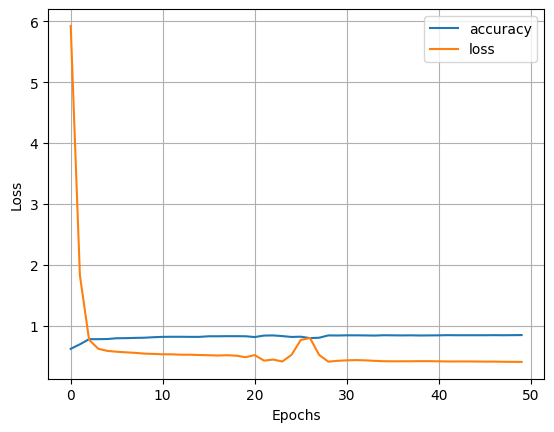

In [80]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.grid(True)

In [81]:
acc_tf = history.history.get("accuracy", [])
acc_tf = acc_tf[-1] * 100

In [86]:
acc_tf

84.69101190567017

**5.6 Support Vector Machine (SVC)**

Support Vector Classifier (SVC) is a supervised learning algorithm that finds the optimal hyperplane separating two classes by maximizing the margin between them.

In [93]:
model_svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

In [94]:
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [95]:
y_pred_svm = model_svm.predict(X_val)

acc_svm = round(model_svm.score(X_train, y_train) * 100, 2)
acc_svm

83.29

In [96]:
print(classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       110
           1       0.80      0.75      0.78        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Insights**

The model performs well on both classes, with less imbalance between precision and recall than KNN or Naive Bayes.

Class 1 recall (0.75) is reasonably strong, meaning fewer positive cases are missed compared to some earlier models.

SVC appears to provide a good balance between bias and variance, making it a strong candidate for final model selection.

**5.7 Random Forest Classifier**

Random Forest Classifier is a supervised ensemble learning algorithm that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

In [97]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

In [99]:
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_val)


acc_rf = round(model_rf.score(X_train, y_train) * 100, 2)
acc_rf 

94.66

In [100]:
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



**Insights**

The model performs better on class 0 than class 1, likely influenced by class imbalance (110 vs 69).

Recall for class 1 (0.68) suggests the model misses a noticeable portion of positive instances.

Random Forest provides stable and reliable performance, but does not outperform your SVC (83%) or Logistic Regression (82%) if those were higher.

**5.8 Gradient Boosting**

Gradient Boosting Classifier is a supervised ensemble algorithm that builds decision trees sequentially, where each new tree corrects the errors of the previous ones to improve overall prediction accuracy.

In [101]:
model_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [102]:
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_val)


acc_gb = round(model_gb.score(X_train, y_train) * 100, 2)
acc_gb 

90.31

In [103]:
print(classification_report(y_val, y_pred_gb))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



**Insights**

The model performs strongly on class 0, with high recall (0.88).

Recall for class 1 (0.71) indicates some difficulty in detecting all positive cases.

With 82% accuracy, Gradient Boosting performs competitively and may be among your top models.

Performance is relatively balanced, suggesting good bias–variance tradeoff.

**5.9 XGBoost**

XGBoost (Extreme Gradient Boosting) is an advanced ensemble learning algorithm that builds decision trees sequentially using gradient boosting, with optimized regularization and performance for improved accuracy and efficiency.

In [108]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    eval_metric='logloss'
)

In [109]:
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_val)

acc_xgb = round(model_xgb.score(X_train, y_train) * 100, 2)
acc_xgb 

89.04

In [110]:
print(classification_report(y_val, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



**Insights**

XGBoost performs exceptionally well on class 0 with high recall (0.91).

Recall for class 1 (0.67) indicates some positive cases are not detected, similar to Gradient Boosting.

Overall, with 82% accuracy, XGBoost is among the top-performing models in your project.

The model balances precision and recall reasonably well, making it reliable for general predictions.

### 6. Model Evaluation

The predictions of all models will be compared in order to select the most suitable model for the final prediction.

In [111]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 'Decision Tree', "TensorFlow", "SVC", "Random Forest", "Gradien Boosting", "XGBoost"],
    'Score': [ acc_knn, acc_log, acc_nb, acc_dt, acc_tf, acc_svm, acc_rf, acc_gb, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,94.660000
6,Random Forest,94.660000
7,Gradien Boosting,90.310000
8,XGBoost,89.040000
0,KNN,84.830000
4,TensorFlow,84.691012
5,SVC,83.290000
1,Logistic Regression,81.740000
2,Naive Bayes,80.200000


### 7. Prediction

As Decition Tree model achieved the highest validation score, it was selected as the final model.

In [ ]:
solution = model_rf.predict(dataset_test) 

In [84]:
predictions = (y_test_pred > 0.5).astype(int).flatten() 

In [85]:
submission_df = pd.DataFrame({
    "PassengerId": pass_col,
    "Survived": predictions 
})
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
